# IMPORTING LIBRARIES AND DATA SET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\vamsi\Downloads\diabetes_data_upload (2) (1) (1).csv",sep =",")

In [3]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


# DATA EXPLORATION

In [4]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
df.shape

(520, 17)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [7]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [8]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


# DATA VISUALIZATION

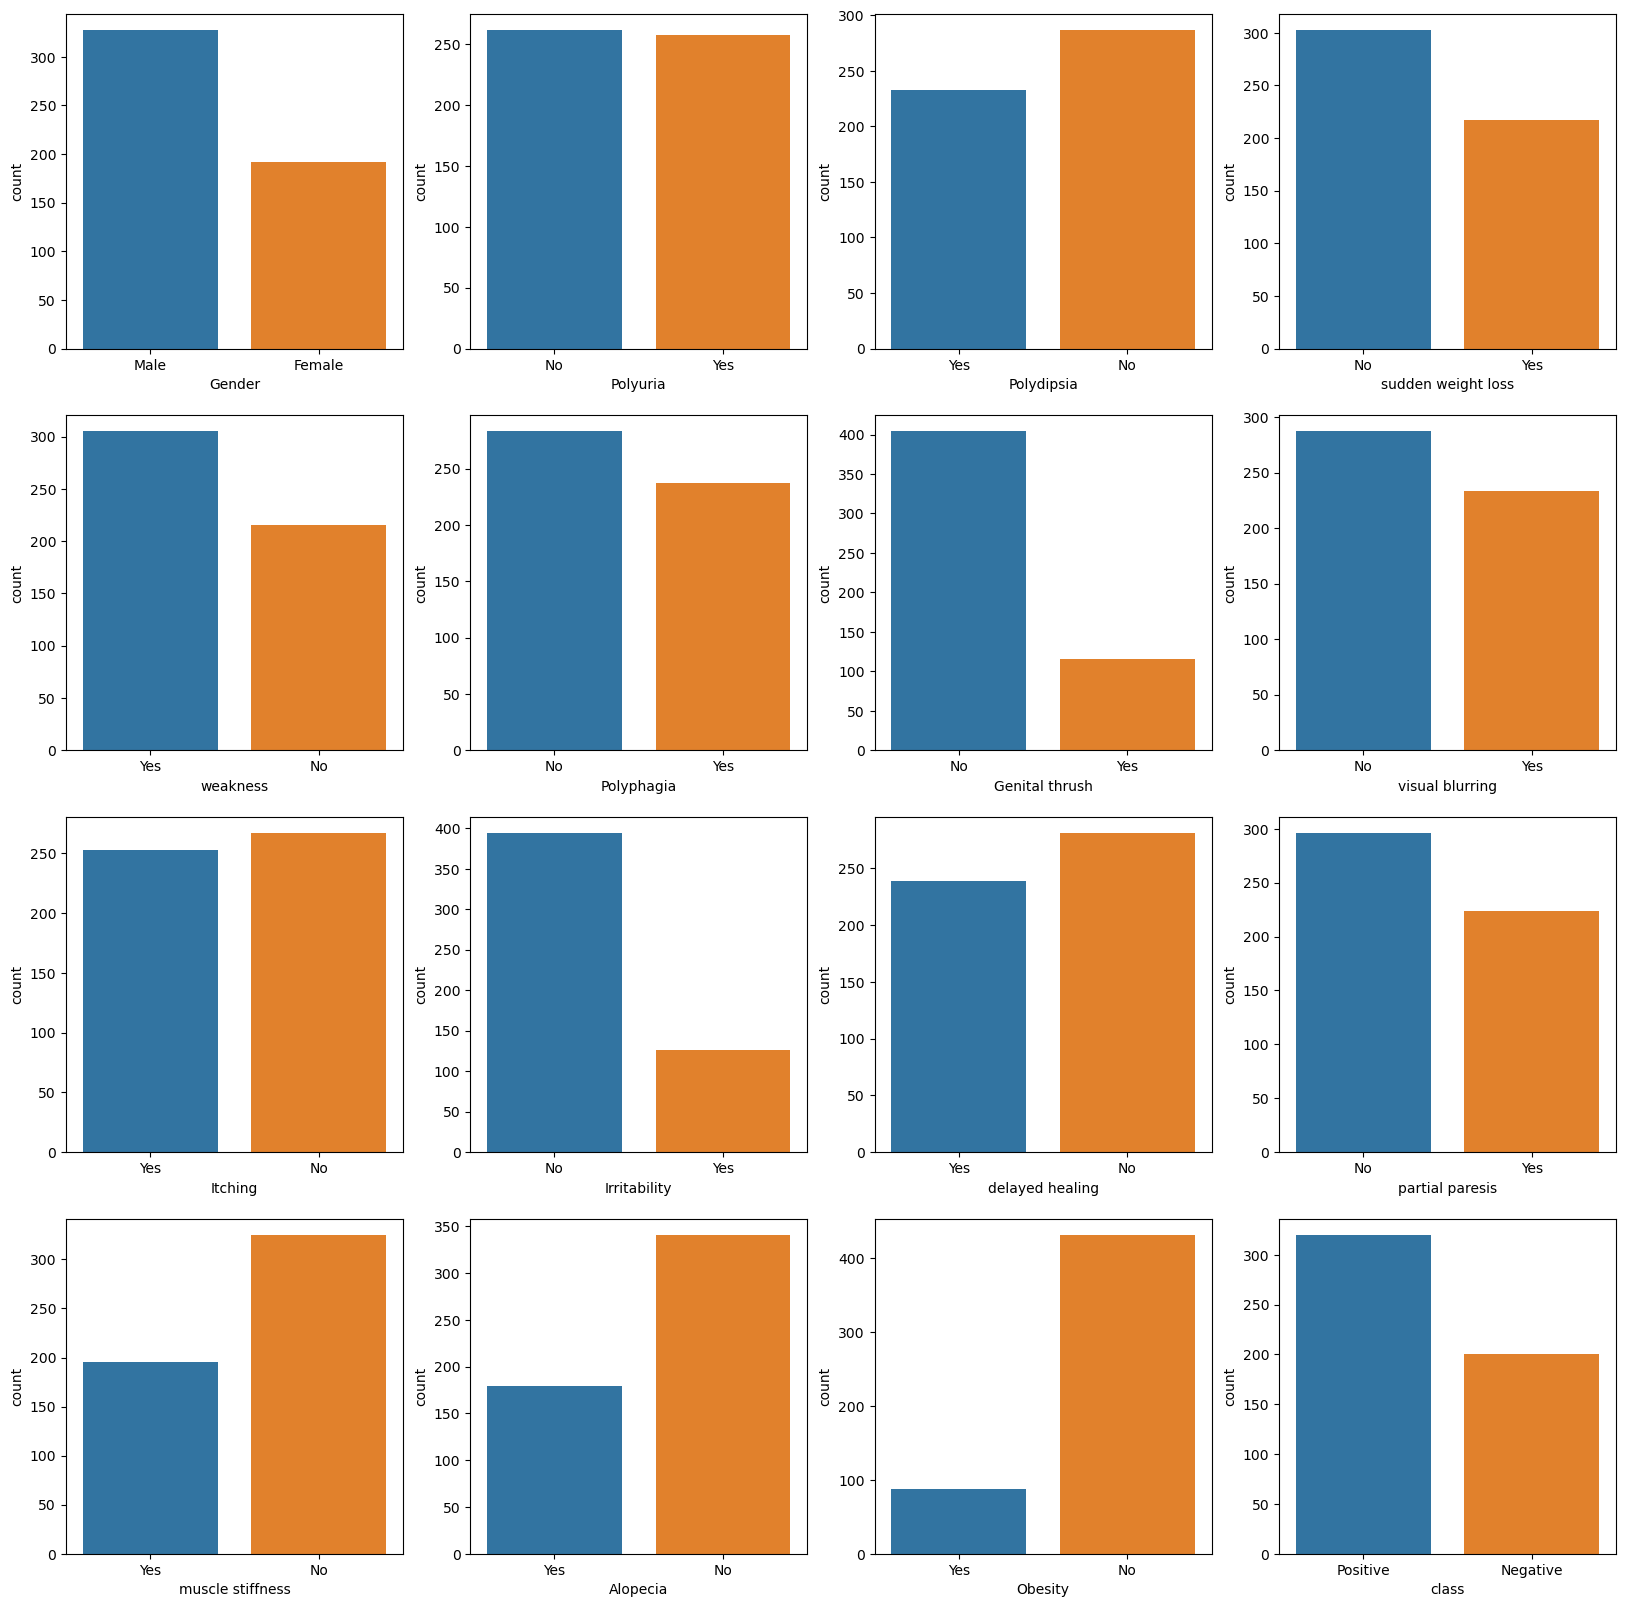

In [9]:
plt.figure(figsize=(20,20))
pltnum=1
for columns in df:
  if columns !='Age':  
   if pltnum <= 17:
     ax = plt.subplot(4,4,pltnum)
     sns.countplot(x=df[columns],data=df)  
   pltnum=pltnum+1

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns[~(df.columns.isin(['Age']))].tolist():
    df[col] = le.fit_transform(df[col])

In [11]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


# DATA PREPROCESSING

In [12]:
x= df.drop('class',axis=1)
y = df['class']

In [13]:
x

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int32

# MODEL BUILDING

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
print(x_train.shape)
print(y_train.shape)

(416, 16)
(416,)


In [17]:
print(x_test.shape)
print(y_test.shape)

(104, 16)
(104,)


In [18]:
#Builidng the model using RandomForest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [19]:
# On training data
rfc_train = rfc.predict(x_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [20]:
predictions = rfc.predict(x_test)

In [21]:
y_pred=rfc.predict(x_test)

In [22]:
#Getting the accuracy score for Random Forest

from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 1.0


In [23]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))


[[40  0]
 [ 0 64]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        64

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



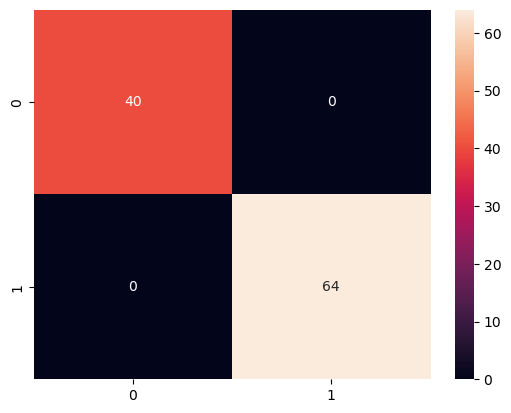

In [24]:
# Heatmap of Confusion matrix
cm=confusion_matrix(y_test, predictions)
sns.heatmap(pd.DataFrame(cm), annot=True)
plt.show()

In [25]:
#Building the model using DecisionTree

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [26]:
predictions = dtree.predict(x_test)

In [27]:
#Getting the accuracy score for Decision Tree

from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.9615384615384616


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[39  1]
 [ 3 61]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        40
           1       0.98      0.95      0.97        64

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



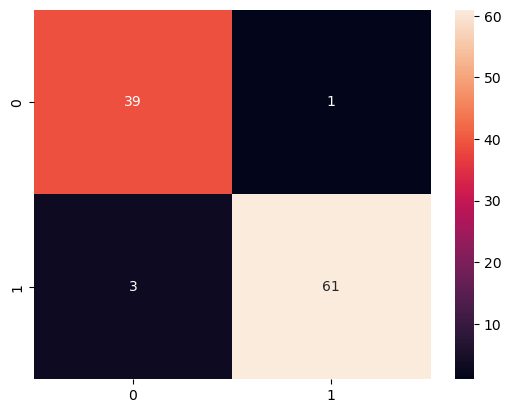

In [29]:
# Heatmap of Confusion matrix
cm=confusion_matrix(y_test, predictions)
sns.heatmap(pd.DataFrame(cm), annot=True)
plt.show()

<AxesSubplot:>

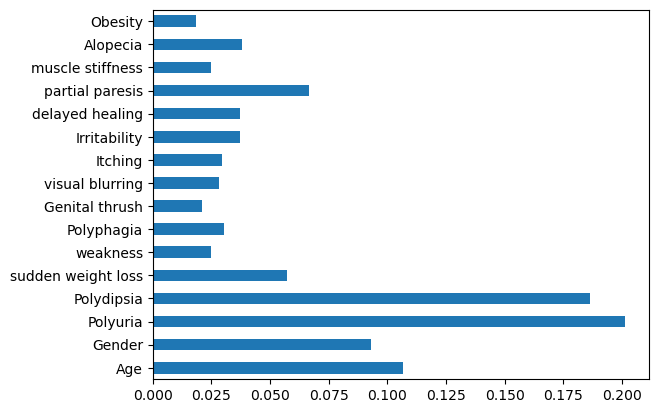

In [30]:
#Plotting feature importances
(pd.Series(rfc.feature_importances_, index=x.columns)
   .plot(kind='barh'))  

In [31]:
rfc.feature_importances_

array([0.10668558, 0.09313261, 0.20139691, 0.18617824, 0.0571189 ,
       0.02473873, 0.03037914, 0.02115409, 0.02804061, 0.02929011,
       0.0373524 , 0.03705973, 0.06644187, 0.0247403 , 0.03798184,
       0.01830894])

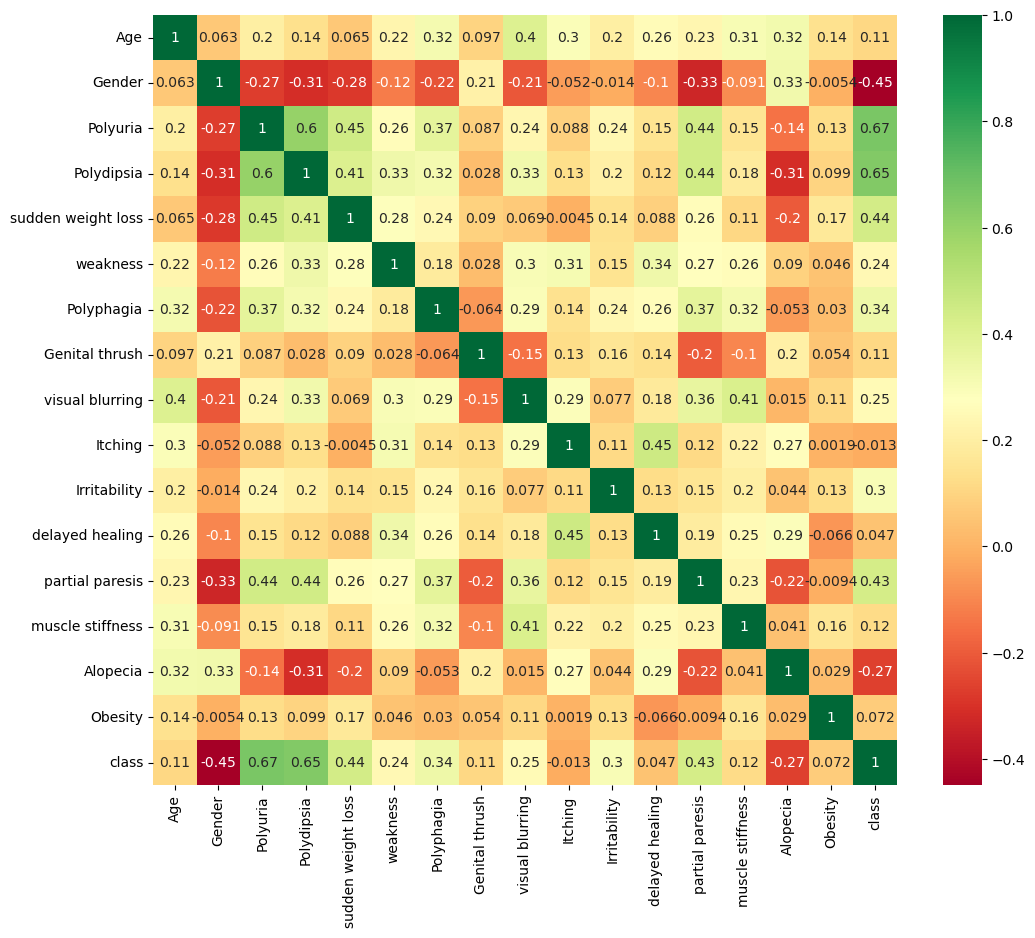

In [32]:
# Correlation between all the features before cleaning
plt.figure(figsize=(12,10))
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has an easy method to showcase heatmap

In [33]:
#Printing prediction probabilities for the test data
print('Prediction Probabilities')
rfc.predict_proba(x_test)

Prediction Probabilities


array([[0.055, 0.945],
       [0.11 , 0.89 ],
       [0.   , 1.   ],
       [0.98 , 0.02 ],
       [0.885, 0.115],
       [0.015, 0.985],
       [0.03 , 0.97 ],
       [0.03 , 0.97 ],
       [0.075, 0.925],
       [0.005, 0.995],
       [0.065, 0.935],
       [1.   , 0.   ],
       [0.1  , 0.9  ],
       [0.055, 0.945],
       [0.025, 0.975],
       [0.   , 1.   ],
       [0.965, 0.035],
       [0.06 , 0.94 ],
       [0.04 , 0.96 ],
       [0.   , 1.   ],
       [0.035, 0.965],
       [0.   , 1.   ],
       [0.02 , 0.98 ],
       [0.95 , 0.05 ],
       [0.91 , 0.09 ],
       [1.   , 0.   ],
       [0.055, 0.945],
       [0.02 , 0.98 ],
       [0.865, 0.135],
       [0.045, 0.955],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.72 , 0.28 ],
       [0.055, 0.945],
       [0.   , 1.   ],
       [0.11 , 0.89 ],
       [0.005, 0.995],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.155, 0.845],
       [0.91 , 0.09 ],
       [0.   , 1.   ],
       [0.8

In [34]:
import pickle
 
# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc)
 
# Then we will be loading that saved model
rfc_from_pickle = pickle.loads(saved_model)
 
# lastly, after loading that model we will use this to make predictions
rfc_from_pickle.predict(x_test)

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [35]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [36]:
df.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
519,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
input_data  = (32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = rfc.predict(input_data_reshaped)
if(prediction[0]==1):
    print("Positive")
else:
    print("Negative")

Negative


In [38]:
input_data  = (40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = rfc.predict(input_data_reshaped)
if(prediction[0]==1):
    print("Positive")
else:
    print("Negative")

Positive


### USER_INPUT FOR VALIDATION OF ML MODEL

In [ ]:
input_data  = tuple(int(x.strip()) for x in input().split(','))
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = rfc.predict(input_data_reshaped)
if(prediction[0]==1):
    print("Positive")
else:
    print("Negative")